# War of the Five Kings--Game of Thrones Battle Analysis

## Introduction

War of the Five Kings is very famous civil war in Game of Thrones。This is an internal disturbance that is unprecedented in scale and affects the seven kingdoms. As the name implies, a total of five people were crowned in the war: Joffrey, Stannis, and Lan Li claimed that they were the legal heirs of the Iron Throne. In addition, Robin Stark was elected as the king of the North by the vassals of the North, and Barron Grejoy establish the flag of independence again, aiming to get rid of the rule of the Iron Throne.



This dataset(battles.csv)include all the war during the time of Five Kings War. It is part of [Game of Thrones](https://www.kaggle.com/mylesoneill/game-of-thrones)in Kaggle.


## Asking Questions



**Questions**：(Use 5W2H Framework)

When--Which year has the most wars? Does summer affect win or not?

Who--Who was involved in wars in this year? Who win the most wars?

Where--At which region were the wars happened in this year? Then,which region has the most wars?Did region affect win or not?

What--What type of wars are mainly used in this year? 

Why--Why this type of wars were used in this year?

How--How the type of wars benefit the war outcome?

How much--How much was the size of each side in this year? Does the size of army effect war outcome?





## Data Exploration and Cleaning

In [1]:
# TO DO: load pacakges & dataset
import pandas as pd
import numpy as np
%matplotlib inline
battles=pd.read_csv("battles.csv")

In [2]:
# TO DO: check the dataset general info
battles.info()
battles.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
name                  38 non-null object
year                  38 non-null int64
battle_number         38 non-null int64
attacker_king         36 non-null object
defender_king         35 non-null object
attacker_1            38 non-null object
attacker_2            10 non-null object
attacker_3            3 non-null object
attacker_4            2 non-null object
defender_1            37 non-null object
defender_2            2 non-null object
defender_3            0 non-null float64
defender_4            0 non-null float64
attacker_outcome      37 non-null object
battle_type           37 non-null object
major_death           37 non-null float64
major_capture         37 non-null float64
attacker_size         24 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
summer                37 non-null flo

,year,battle_number,defender_3,defender_4,major_death,major_capture,attacker_size,defender_size,summer
count,38.000000,38.000000,0.0,0.0,37.000000,37.000000,24.000000,19.000000,37.000000
mean,299.105263,19.500000,NaN,NaN,0.351351,0.297297,9942.541667,6428.157895,0.702703
std,0.689280,11.113055,NaN,NaN,0.483978,0.463373,20283.092065,6225.182106,0.463373
min,298.000000,1.000000,NaN,NaN,0.000000,0.000000,20.000000,100.000000,0.000000
25%,299.000000,10.250000,NaN,NaN,0.000000,0.000000,1375.000000,1070.000000,0.000000
50%,299.000000,19.500000,NaN,NaN,0.000000,0.000000,4000.000000,6000.000000,1.000000
75%,300.000000,28.750000,NaN,NaN,1.000000,1.000000,8250.000000,10000.000000,1.000000
max,300.000000,38.000000,NaN,NaN,1.000000,1.000000,100000.000000,20000.000000,1.000000


In [3]:
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [4]:
# check whethere there's duplications or not
battles.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
dtype: bool

From above, we can see the main problems are NA values and the type of "year" should be "object" instead of "int". The good thing is that there's no duplications in this dataset.

In [6]:
# Clean the data 
#change the type of year into object
battles["year"]=battles["year"].astype("object")

In [7]:
#Deal with NA values
#a. Delete those columns with more than 70% values are NA( those columns are attacker2,3,4,defender 2,3,4,note)
battles=battles.drop(battles.columns[[6,7,8,10,11,12,24]],axis=1)
battles.shape


(38, 18)

In [8]:
#b.for summer variable, we need to change it to object type and then fill it with backward/forward values

battles["summer"]=battles["summer"].astype("object")
battles["summer"]=battles["summer"].fillna(method="pad",limit=1)


In [9]:
#c. For battle_type, we use pitched battle to fill missing values since there's very tiny effect for it increase 1 .
battles["battle_type"].value_counts()
battles["battle_type"]=battles["battle_type"].fillna("pitchced battle")
battles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 18 columns):
name                  38 non-null object
year                  38 non-null object
battle_number         38 non-null int64
attacker_king         36 non-null object
defender_king         35 non-null object
attacker_1            38 non-null object
defender_1            37 non-null object
attacker_outcome      37 non-null object
battle_type           38 non-null object
major_death           37 non-null float64
major_capture         37 non-null float64
attacker_size         24 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
summer                38 non-null float64
location              37 non-null object
region                38 non-null object
dtypes: float64(5), int64(1), object(12)
memory usage: 5.4+ KB


There are still some NA values in other variables, but most of them we are not going to use in our analysis, so just leave them as they are like.

## Exploration Data Analysis

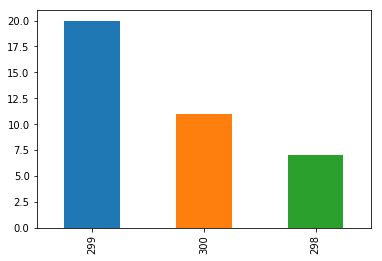

In [11]:
#When--Which year has the most wars? Does summer affect win or not?
battles["year"].value_counts().plot(kind="bar")

We can see the year of 299 has the most wars

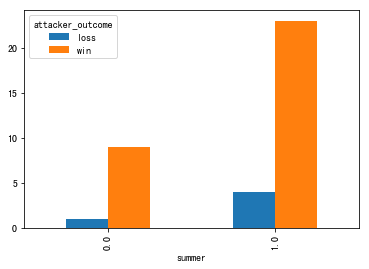

In [52]:
#Summer VS acttacker_outcome
battles.groupby(['attacker_outcome','summer'])['attacker_outcome'].count().unstack(0).plot.bar()

Since (the count of loss/count of win not in summer )> (the count of loss/count of win in summer), we could see when the war happened in summer, it is more likely to win for attacker side

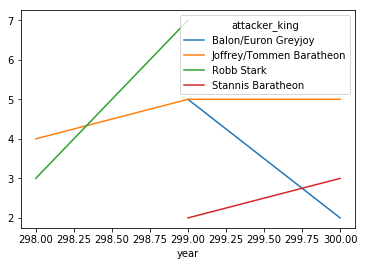

In [14]:
#Who--Who was involved in wars in this year? Who win the most wars?
battles.groupby("year").attacker_king.value_counts().unstack().plot(kind="line")


From above, we can see Robb involved most wars in 299, after 299,he was not active at all;Similar situation with Balon, the number of war he involved was decreasing, there must be some reason, either they won or lost in those wars.

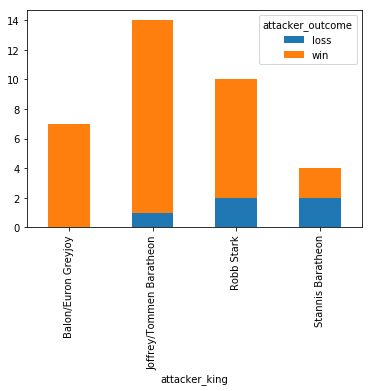

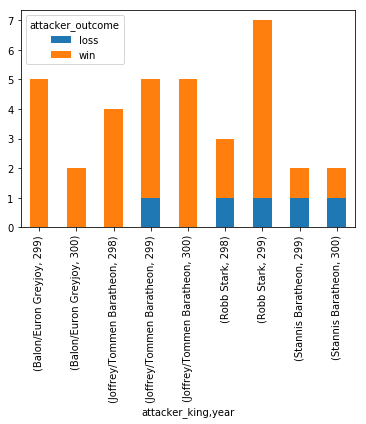

In [35]:
#Who win the most wars and in which year?
battles.groupby("attacker_king").attacker_outcome.value_counts().unstack().plot(kind="bar",stacked=True)
battles.groupby(["attacker_king","year"]).attacker_outcome.value_counts().unstack().plot(kind="bar",stacked=True)

From above, we can see Joffrey won the most wars, actually,he had lost in some war in the year of 299,however,in the year of 300, he won in every war; Balon, on the other hand, never lost in each war ,so we can now answer the question above that Balon involved less and less wars was because he had claimed king in one area.

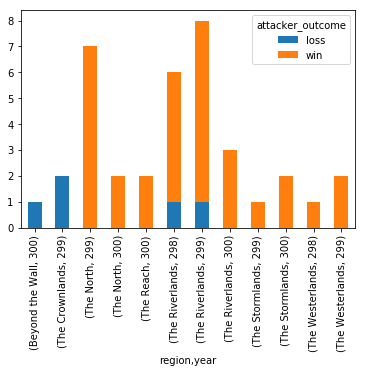

In [41]:
#Where--At which region were the wars happened in this year? Then,which region has the most wars?Did region affect win or not?
battles.groupby(["region","year"])["attacker_outcome"].value_counts().unstack().plot.bar(stacked=True)

From above, we can see in the year of 299, except the North and Beyond the wall, all regions had wars.The Riverlands had most wars, then it's the North. We do see that in these regions, the North,the Stomlands,the Reach and the Westerlands,attackers never lost a war,which indicates these regions more or less benefit to these attackers, while in the region of Beyond the Wall and the Crownlands,attackers lost every war, which means these regions are not good for attackers to conduct their wars.

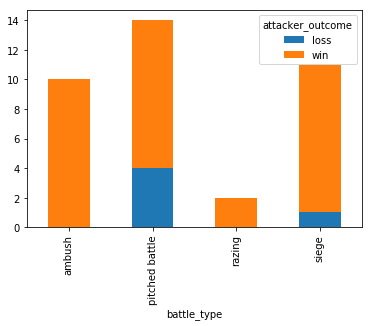

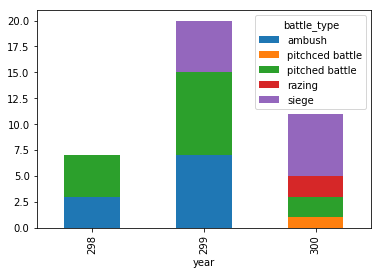

In [36]:
#What--What type of wars are mainly used in this year? 
#Why--Why this type of wars were used in this year?
#How--How the type of wars benefit the war outcome?


#Battle_type VS attacker_outcome
battles.groupby("battle_type")['attacker_outcome'].value_counts().unstack().plot.bar(stacked=True)
#Battle_type VS Year
battles.groupby("year")['battle_type'].value_counts().unstack().plot.bar(stacked=True)

We can see from the chart of battle type VS outcome, when the battle type is ambush and razing, the attacker could always win;Obviously, razing means the attacker has a good advantage in the war, so it is not surprising that the attacker could win, however, when each side was in the same condition, ambush was definitely a useful war type for attacker use to win.

We can also see from the chart of year VS battle type, in the beginning of Five King Wars, the year of 288 and 299, the main type of war are ambush and pitched battle; however, in the late time of wars, the type of razing and siege had emerged, which may indicate that the final win and loss will soon be clarified.

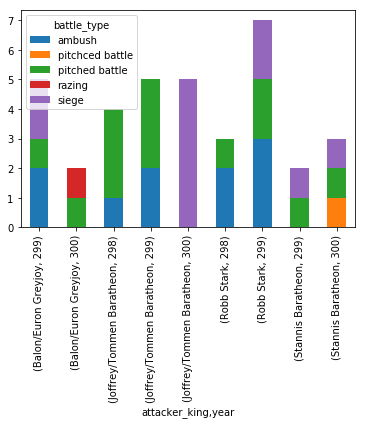

In [43]:
#Which type of wars did the kings take in each years?
battles.groupby(["attacker_king","year"])["battle_type"].value_counts().unstack().plot.bar(stacked=True)


From above chart, we can see it is consistent with the chart of "king,year VS outcome", in the year of 300, Joffrey had the outstanding advantage in wars, all the war type were siege and he won in every war.And we know Balon used the type of razing to get the final victory

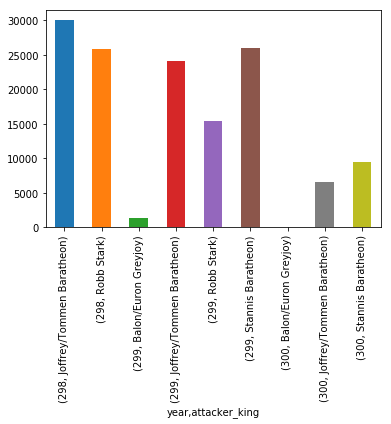

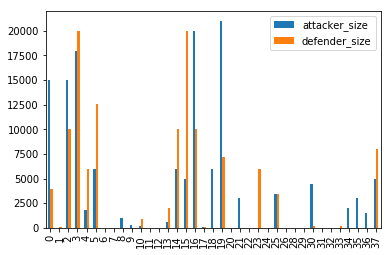

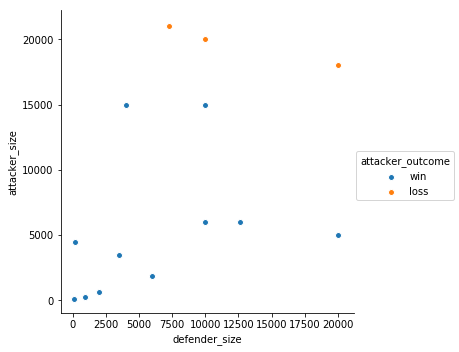

In [51]:
#How much--How much was the size of each side in this year? Does the size of army effect war outcome?
import seaborn as sns
battles=battles.drop(27)##drop the unnormal value
battles.groupby(["year","attacker_king"])["attacker_size"].sum().plot.bar()
battles[["attacker_size","defender_size"]].plot(kind = "bar")
sns.pairplot(x_vars=["defender_size"], y_vars=["attacker_size"], data=battles, hue="attacker_outcome",size=5)

From above, we can see Stannis had the largest size in the year of 299, then it comes to Joffey and Robb. The reason maybe that both Joffey and Robb started their war in the year of 298, while Stannis in 299. Besides,the size of army was decreasing in the late of wars. Also,we can see there's no very outstanding relationship between army size and war outcome, even a much smaller size of one side can win the other.

## Conclusion

a. When--The year of 299 have the most wars, when the war happens in summer, the attacker side is more likely to win.

b. Who--All kings have attended the wars in the year of 299. Robb won the most number of wars in that year, 6 in total and claimed king since then. While Joffey attended most wars and won most wars in total, in the year of 300,he never lost any war. Balon, though attended wars from 299, never lost any war.

c. Where--Except the North and Beyond the wall, all regions had wars in the year of 299.Both the Riverlands and the North have the most wars in this year, 7 in total, while in other years, Riverlands had the most wars happened. Also, the region did have some effect on the war outcome. The North,the Stomlands,the Reach and the Westerlands benefit to attackers, while Beyond the Wall and the Crownlands are not good for attackers to conduct their wars.

d. What&Why--Pitched battles are the most frequently used type of wars in the year of 299,the middle of Five King Wars, however, in the latetime of Wars, siege has become the main format of war since the win or loss had been clarified over time.

e. How--Ambush helped attacker won every war, which attacked enemies when they are unsuspecting. Siege and razing were used when it is the late time of wars since the difference of strength between each side has been claried.

f. How much--Stannis had the largest size in the year of 299, then it comes to Joffey and Robb.Also, over the time, the size of each side had been decreasing for the war had been in the final stage. Besides, there's no outstanding relationship between the size of army and the outcome of wars.
